In [1]:
# Para descomprimir datos como si fuera la terminal
#! tar -xvf ecobici.tar.gz -C data/

# Librerías

In [2]:
import pandas as pd
import numpy as np
import os
import gc

In [3]:
pd.options.display.float_format = '{:,.3f}'.format

# Introducción


Clara nos dió el dataset de las ecobicis
Quiere que seamos creativos para resolver problemas con los datos
como científicos de datos

* Promedio de duración
* Horas "pico"
* Calculo de distancias

* Problema: Proyeción de población de bicicletas
* Problema: Oferta / Demanda
  
* Problema: Mantenimiento
* Problema: Costo de membresia
* Problema: Nuevas estaciones
* Problema: Marketing
* Problema: Logística / rutas
* Problema: Robo

# Lectura de Insumos

In [4]:
ruta = 'data'

In [5]:
cat_estacion = pd.read_csv( os.path.join( ruta , 'estaciones-de-ecobici.csv' ))

In [6]:
cat_estacion.head()

,ID,Nombre,Dirección,Número,Código postal,districtCode,Colonia,altitude,nearbyStations/0,location/lat,location/lon,Tipo de estación,nearbyStations/1,nearbyStations/2,nearbyStations/3,nearbyStations/4,nearbyStations/5,punto_geo
0,416,416 RECREO-PARROQUÍA,416 - Recreo-Parroquía,S/N,"3,104.000",1,Ampliación Granada,NaN,390,19.371,-99.178,BIKE,391.000,415.000,NaN,NaN,NaN,"19.371308,-99.177607"
1,440,440 REAL DE MAYORAZGO-PUENTE XOCO,440 - Real De Mayorazgo-Puente Xoco,S/N,"3,330.000",1,Ampliación Granada,NaN,433,19.361,-99.169,BIKE,439.000,441.000,NaN,NaN,NaN,"19.36065,-99.168669"
2,70,70 PARQUE MEXICO-MICHOACAN,070 - Parque México - Michoacan,S/N,"6,100.000",1,Ampliación Granada,NaN,69,19.411,-99.170,"BIKE,TPV",71.000,76.000,NaN,NaN,NaN,"19.411272,-99.169718"
3,325,325 PROVIDENCIA -AVENIDA DEL VALLE,325 - Providencia -Avenida Del Valle,S/N,"3,100.000",1,Ampliación Granada,NaN,316,19.388,-99.170,BIKE,335.000,336.000,NaN,NaN,NaN,"19.3881779,-99.1696894"
4,252,252 VICTOR HUGO-SHAKESPEARE,252 - Víctor Hugo-Shakespeare,S/N,"11,510.000",2,Anzures,NaN,249,19.428,-99.177,BIKE,251.000,253.000,NaN,NaN,NaN,"19.427575,-99.17702"


In [7]:
#Lista de archivos en ruta
lst_f = os.listdir(ruta)

In [8]:
#Todos los archivos que inician con "20"
lst_f = [ f for i,f in enumerate(lst_f) if f[:2] == '20']

In [9]:
print("Total de archivos")
len(lst_f)

Total de archivos


24

In [10]:
lst_df = []

In [11]:
# Lectura de todos los archivos
for id_ in range(len(lst_f)):
    print("archivo: ",id_)
    lst_df.append( pd.read_csv( os.path.join( ruta , lst_f[id_] ) ) )

archivo:  0


/tmp/ipykernel_88627/490836504.py:4: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  lst_df.append( pd.read_csv( os.path.join( ruta , lst_f[id_] ) ) )


archivo:  1


/tmp/ipykernel_88627/490836504.py:4: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  lst_df.append( pd.read_csv( os.path.join( ruta , lst_f[id_] ) ) )


archivo:  2
archivo:  3


/tmp/ipykernel_88627/490836504.py:4: DtypeWarning: Columns (2,6,9) have mixed types. Specify dtype option on import or set low_memory=False.
  lst_df.append( pd.read_csv( os.path.join( ruta , lst_f[id_] ) ) )


archivo:  4


/tmp/ipykernel_88627/490836504.py:4: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  lst_df.append( pd.read_csv( os.path.join( ruta , lst_f[id_] ) ) )


archivo:  5
archivo:  6


/tmp/ipykernel_88627/490836504.py:4: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  lst_df.append( pd.read_csv( os.path.join( ruta , lst_f[id_] ) ) )


archivo:  7
archivo:  8
archivo:  9


/tmp/ipykernel_88627/490836504.py:4: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  lst_df.append( pd.read_csv( os.path.join( ruta , lst_f[id_] ) ) )


archivo:  10
archivo:  11
archivo:  12
archivo:  13
archivo:  14


/tmp/ipykernel_88627/490836504.py:4: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  lst_df.append( pd.read_csv( os.path.join( ruta , lst_f[id_] ) ) )


archivo:  15


/tmp/ipykernel_88627/490836504.py:4: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  lst_df.append( pd.read_csv( os.path.join( ruta , lst_f[id_] ) ) )


archivo:  16
archivo:  17
archivo:  18
archivo:  19


/tmp/ipykernel_88627/490836504.py:4: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  lst_df.append( pd.read_csv( os.path.join( ruta , lst_f[id_] ) ) )


archivo:  20
archivo:  21


/tmp/ipykernel_88627/490836504.py:4: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  lst_df.append( pd.read_csv( os.path.join( ruta , lst_f[id_] ) ) )


archivo:  22
archivo:  23


/tmp/ipykernel_88627/490836504.py:4: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  lst_df.append( pd.read_csv( os.path.join( ruta , lst_f[id_] ) ) )


In [12]:
df_viajes = pd.concat(lst_df, ignore_index=True)

In [13]:
df_viajes.head()

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,Hora_Arribo,Unnamed: 9
0,M,44,10225,169,01/11/2017,0:00:09,447,01/11/2017,0:11:47,NaN
1,M,35,8106,359,01/11/2017,0:02:16,338,01/11/2017,0:05:54,NaN
2,M,27,10899,84,01/11/2017,0:02:54,150,01/11/2017,0:06:30,NaN
3,M,27,9931,137,01/11/2017,0:03:12,182,01/11/2017,0:19:02,NaN
4,M,23,8934,134,01/11/2017,0:03:54,116,01/11/2017,0:10:24,NaN


In [14]:
df_viajes.tail()

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,Hora_Arribo,Unnamed: 9
17104568,F,37,11043,140,27/02/2018,23:58:19,291,28/02/2018,0:18:29,NaN
17104569,M,35,15129,257,27/02/2018,23:58:28,139,28/02/2018,0:23:59,NaN
17104570,M,37,7426,147,27/02/2018,23:59:28,164,28/02/2018,0:09:06,NaN
17104571,M,70,10429,95,27/02/2018,23:59:43,88,28/02/2018,0:16:39,NaN
17104572,M,28,9789,295,27/02/2018,23:59:55,172,28/02/2018,0:25:03,NaN


In [15]:
df_viajes.shape

(17104573, 10)

In [16]:
len(lst_df) , len(lst_f)

(24, 24)

In [17]:
# Eliminar y liberar memoria de cada DataFrame en la lista
for df in lst_df:
    del df

gc.collect()  # llamada para recolección de basura, para liberar memoria

0

# Inspección / Exploración 

In [18]:
df_viajes.dtypes

Genero_Usuario           object
Edad_Usuario              int64
Bici                     object
Ciclo_Estacion_Retiro     int64
Fecha_Retiro             object
Hora_Retiro              object
Ciclo_Estacion_Arribo    object
Fecha_Arribo             object
Hora_Arribo              object
Unnamed: 9               object
dtype: object

In [19]:
df_viajes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17104573 entries, 0 to 17104572
Data columns (total 10 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   Genero_Usuario         object
 1   Edad_Usuario           int64 
 2   Bici                   object
 3   Ciclo_Estacion_Retiro  int64 
 4   Fecha_Retiro           object
 5   Hora_Retiro            object
 6   Ciclo_Estacion_Arribo  object
 7   Fecha_Arribo           object
 8   Hora_Arribo            object
 9   Unnamed: 9             object
dtypes: int64(2), object(8)
memory usage: 1.3+ GB


In [20]:
for c in df_viajes.columns:
    print(c,df_viajes[c].map(type).unique().tolist() )

Genero_Usuario [<class 'str'>]
Edad_Usuario [<class 'int'>]
Bici [<class 'str'>, <class 'int'>]
Ciclo_Estacion_Retiro [<class 'int'>]
Fecha_Retiro [<class 'str'>]
Hora_Retiro [<class 'str'>]
Ciclo_Estacion_Arribo [<class 'int'>, <class 'str'>]
Fecha_Arribo [<class 'str'>]
Hora_Arribo [<class 'str'>]
Unnamed: 9 [<class 'float'>, <class 'str'>]


In [21]:
df_viajes['Bici'].value_counts()

Bici
9438     2915
10501    2901
9892     2851
10199    2847
10606    2838
         ... 
14101       1
14074       1
1049        1
3568        1
10317       1
Name: count, Length: 16767, dtype: int64

In [22]:
df_viajes['Bici'].map(type).value_counts(), df_viajes['Bici'].map(type).value_counts(True)

(Bici
 <class 'int'>    13098199
 <class 'str'>     4006374
 Name: count, dtype: int64,
 Bici
 <class 'int'>   0.766
 <class 'str'>   0.234
 Name: proportion, dtype: float64)

In [23]:
df_viajes['Unnamed: 9'].value_counts()

Unnamed: 9
08:41:11    1
Name: count, dtype: int64

In [24]:
# Imprimir el viaje "extraño"
df_viajes.loc[ df_viajes['Unnamed: 9'] == '08:41:11' ]

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,Hora_Arribo,Unnamed: 9
2347258,M,44,9944,267,06/03/2019,08:06:23,32:11.8,10,00:00:00,08:41:11


In [26]:
# Optimizar el uso de memoria ajustando los tipos de datos # Usar int de 32 bits en lugar de 64
df_viajes['Edad_Usuario'] = df_viajes['Edad_Usuario'].astype('int32')
df_viajes['Ciclo_Estacion_Retiro '] = df_viajes['Ciclo_Estacion_Retiro'].astype('int32')

In [27]:
df_viajes = df_viajes.loc[ df_viajes['Unnamed: 9'] != '08:41:11' ].reset_index(drop=True)

In [28]:
df_viajes.shape

(17104572, 11)

In [29]:
df_viajes['Unnamed: 9'].value_counts()

Series([], Name: count, dtype: int64)

In [30]:
df_viajes.drop(columns={'Unnamed: 9'},inplace=True)

In [31]:
df_viajes.head()

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,Hora_Arribo,Ciclo_Estacion_Retiro
0,M,44,10225,169,01/11/2017,0:00:09,447,01/11/2017,0:11:47,169
1,M,35,8106,359,01/11/2017,0:02:16,338,01/11/2017,0:05:54,359
2,M,27,10899,84,01/11/2017,0:02:54,150,01/11/2017,0:06:30,84
3,M,27,9931,137,01/11/2017,0:03:12,182,01/11/2017,0:19:02,137
4,M,23,8934,134,01/11/2017,0:03:54,116,01/11/2017,0:10:24,134


In [32]:
df_viajes.dtypes

Genero_Usuario            object
Edad_Usuario               int32
Bici                      object
Ciclo_Estacion_Retiro      int64
Fecha_Retiro              object
Hora_Retiro               object
Ciclo_Estacion_Arribo     object
Fecha_Arribo              object
Hora_Arribo               object
Ciclo_Estacion_Retiro      int32
dtype: object

In [33]:
# Eliminación de viajes con fechas vacías
df_viajes = df_viajes[ (~df_viajes['Fecha_Retiro'].isna()) | (~df_viajes['Fecha_Arribo'].isna()) ].reset_index(drop=True)

In [34]:
df_viajes.shape

(17104572, 10)

In [35]:
df_viajes['fh_retiro'] = pd.to_datetime(df_viajes['Fecha_Retiro'].map( lambda x: x[-4:]+'-'+x[3:5]+'-'+x[:2] ) +' ' + df_viajes['Hora_Retiro'].map( lambda x: x ) , errors='coerce')

In [36]:
df_viajes['fh_arribo'] = pd.to_datetime(df_viajes['Fecha_Arribo'].map( lambda x: x[-4:]+'-'+x[3:5]+'-'+x[:2] ) +' ' + df_viajes['Hora_Arribo'].map( lambda x: x ) , errors='coerce')

In [37]:
df_viajes.drop(columns={'Fecha_Retiro','Hora_Retiro'},inplace=True)

In [38]:
df_viajes.drop(columns={'Fecha_Arribo','Hora_Arribo'},inplace=True)

In [39]:
df_viajes.head()

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Ciclo_Estacion_Arribo,Ciclo_Estacion_Retiro,fh_retiro,fh_arribo
0,M,44,10225,169,447,169,2017-11-01 00:00:09,2017-11-01 00:11:47
1,M,35,8106,359,338,359,2017-11-01 00:02:16,2017-11-01 00:05:54
2,M,27,10899,84,150,84,2017-11-01 00:02:54,2017-11-01 00:06:30
3,M,27,9931,137,182,137,2017-11-01 00:03:12,2017-11-01 00:19:02
4,M,23,8934,134,116,134,2017-11-01 00:03:54,2017-11-01 00:10:24


In [40]:
df_viajes.dtypes

Genero_Usuario                    object
Edad_Usuario                       int32
Bici                              object
Ciclo_Estacion_Retiro              int64
Ciclo_Estacion_Arribo             object
Ciclo_Estacion_Retiro              int32
fh_retiro                 datetime64[ns]
fh_arribo                 datetime64[ns]
dtype: object

In [41]:
df_viajes.loc[ df_viajes['fh_retiro'].isna()]

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Ciclo_Estacion_Arribo,Ciclo_Estacion_Retiro,fh_retiro,fh_arribo
5730874,M,19,8026,18,400,18,NaT,2019-04-28 01:15:10


In [42]:
df_viajes.loc[ df_viajes['fh_arribo'].isna()]

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Ciclo_Estacion_Arribo,Ciclo_Estacion_Retiro,fh_retiro,fh_arribo


In [43]:
df_viajes = df_viajes.loc[ ~df_viajes['fh_retiro'].isna()].reset_index(drop=True)

In [44]:
df_viajes['Genero_Usuario'].value_counts() , df_viajes['Genero_Usuario'].value_counts(True)*100

(Genero_Usuario
 M    12818962
 F     4285609
 Name: count, dtype: int64,
 Genero_Usuario
 M   74.945
 F   25.055
 Name: proportion, dtype: float64)

In [45]:
df_viajes['Genero_Usuario'].isna().sum()

np.int64(0)

In [46]:
df_viajes['Edad_Usuario'].value_counts() , df_viajes['Edad_Usuario'].value_counts(True)*100

(Edad_Usuario
 28     979322
 29     944615
 27     927441
 30     895171
 26     855790
         ...  
 108         1
 99          1
 100         1
 85          1
 101         1
 Name: count, Length: 86, dtype: int64,
 Edad_Usuario
 28    5.725
 29    5.523
 27    5.422
 30    5.234
 26    5.003
        ... 
 108   0.000
 99    0.000
 100   0.000
 85    0.000
 101   0.000
 Name: proportion, Length: 86, dtype: float64)

<Axes: >

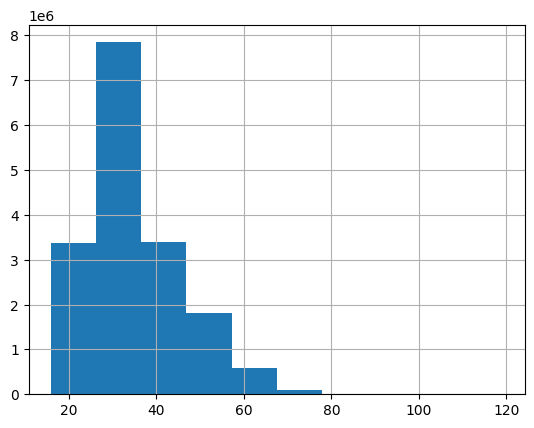

In [47]:
df_viajes['Edad_Usuario'].hist()

In [48]:
df_viajes['Edad_Usuario'].describe(percentiles=np.arange(0,1.01,.1))

count   17,104,571.000
mean            34.936
std             10.307
min             16.000
0%              16.000
10%             24.000
20%             27.000
30%             28.000
40%             30.000
50%             32.000
60%             35.000
70%             38.000
80%             43.000
90%             50.000
100%           119.000
max            119.000
Name: Edad_Usuario, dtype: float64

In [49]:
df_horas = df_viajes['fh_retiro'].map( lambda fecha: fecha.hour ).value_counts(True).sort_index()

<Axes: xlabel='fh_retiro'>

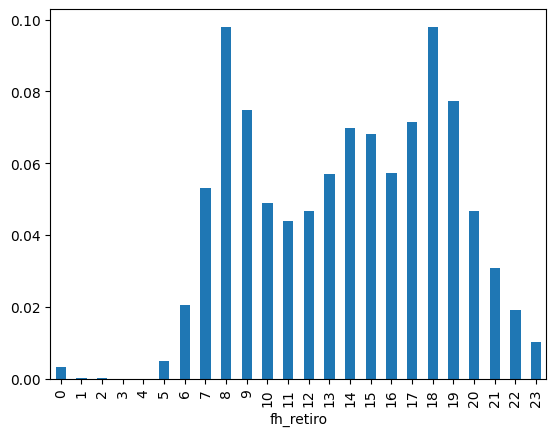

In [50]:
df_horas.plot(kind='bar')

In [51]:
df_horas.reset_index()

,fh_retiro,proportion
0,0,0.003
1,1,0.000
2,2,0.000
3,3,0.000
4,4,0.000
5,5,0.005
6,6,0.021
7,7,0.053
8,8,0.098
9,9,0.075


In [52]:
df_horas.reset_index()

,fh_retiro,proportion
0,0,0.003
1,1,0.000
2,2,0.000
3,3,0.000
4,4,0.000
5,5,0.005
6,6,0.021
7,7,0.053
8,8,0.098
9,9,0.075


# Gráficas

In [53]:
# Tomo el 10% de los viajes y obtengo los viajes por hora
df_horas_muestra = df_viajes['fh_retiro'].sample(frac=.1).map( lambda fecha: fecha.hour ).value_counts(True).sort_index()

<Axes: xlabel='fh_retiro'>

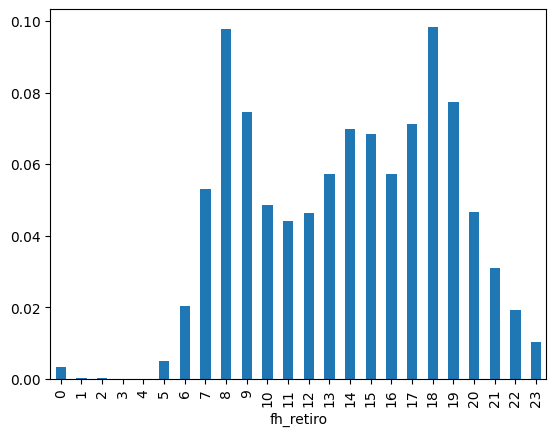

In [54]:
df_horas_muestra.plot(kind='bar')

<Axes: xlabel='fh_retiro'>

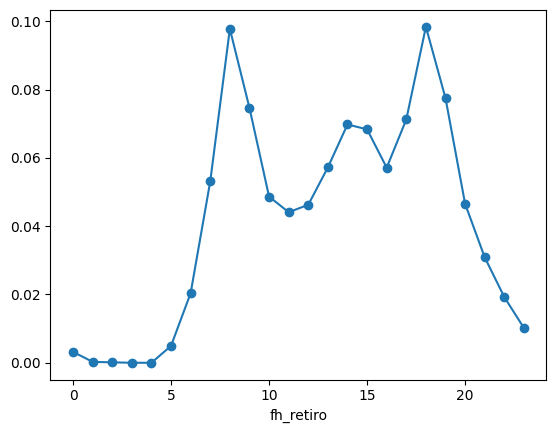

In [58]:
df_horas_muestra.plot(marker='o')

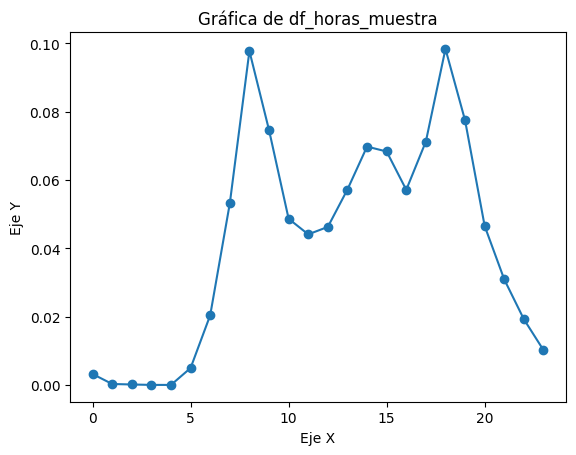

In [63]:
import matplotlib.pyplot as plt

plt.plot(df_horas_muestra, marker='o')

# Títulos y etiquetas
plt.title('Gráfica de df_horas_muestra')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')

# Mostrar la gráfica
plt.show()


In [79]:
import plotly.express as px

# Crear la gráfica de barras interactiva
fig = px.bar(df_horas_muestra.reset_index(), x='fh_retiro', y='proportion', title="Proporción Ecobici por hora")

# Agregar etiquetas a las barras
#fig.update_traces(text=df_horas_muestra.reset_index()['proportion'].apply( lambda x: round(x,2) ) )

fig.show()

In [80]:
# Crear la gráfica de barras interactiva
fig = px.line(df_horas_muestra.reset_index(), x='fh_retiro', y='proportion', title="Proporción Ecobici por hora")

# Agregar etiquetas a las barras
#fig.update_traces(text=df_horas_muestra.reset_index()['proportion'].apply( lambda x: round(x,2) ) )

fig.show()